In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [294]:
plt.rc('font', family = 'Malgun Gothic')
df = pd.read_csv('./Data/titanic_train.csv', index_col = 0)

In [295]:
df['Embarked'] = df['Embarked'].fillna('S')

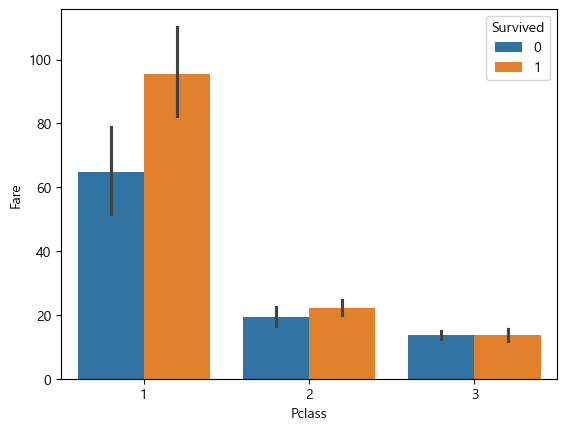

In [296]:
#사망자, 생존자 수 비교

sns.barplot(df, x = 'Pclass', y = 'Fare', hue = 'Survived')
plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

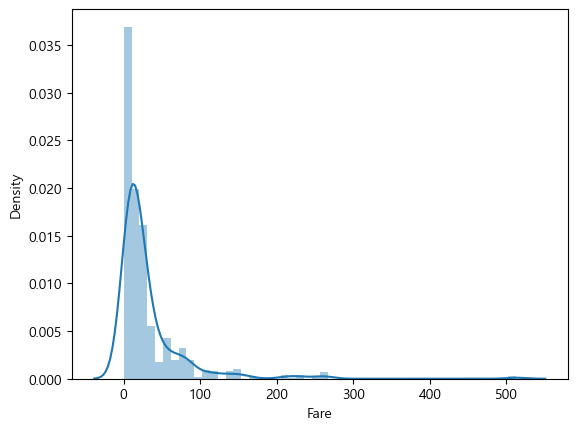

In [297]:
#Fare 변수 밀도

sns.distplot(df['Fare'])

In [298]:
# Fare 가 500 이상인 고객
df[df['Fare'] >= 500]  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [299]:
#이상치 조정
df.loc[df['Fare'] >= 500, 'Fare'] = 512 / 3 

In [300]:
df.loc[[259,680,738],]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,170.666667,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,170.666667,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,170.666667,B101,C


In [301]:
#사망자 , 생존자 나누기

perish = df[df['Survived'] == 0]
survivor = df[df['Survived'] == 1]

In [302]:
perish['Survived'].value_counts()

Survived
0    549
Name: count, dtype: int64

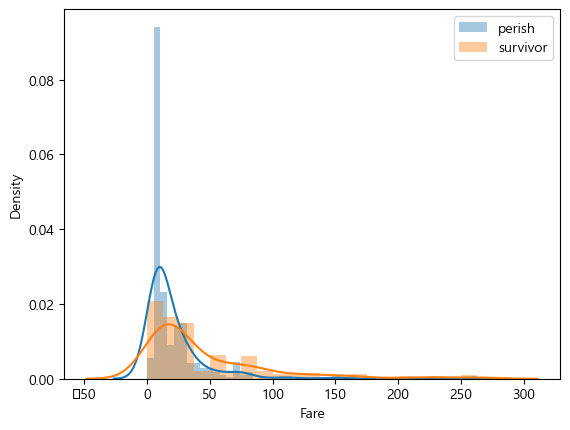

In [303]:
sns.distplot(perish['Fare'] , label = 'perish')
sns.distplot(survivor['Fare'], label = 'survivor')
plt.legend()
plt.show()

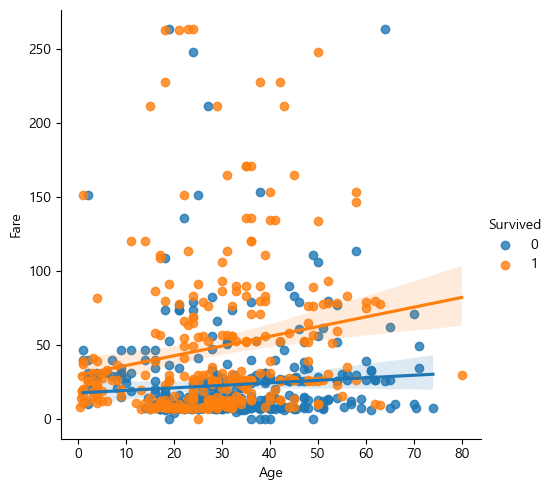

In [304]:
sns.lmplot(df, x = 'Age', y = 'Fare', hue = 'Survived')

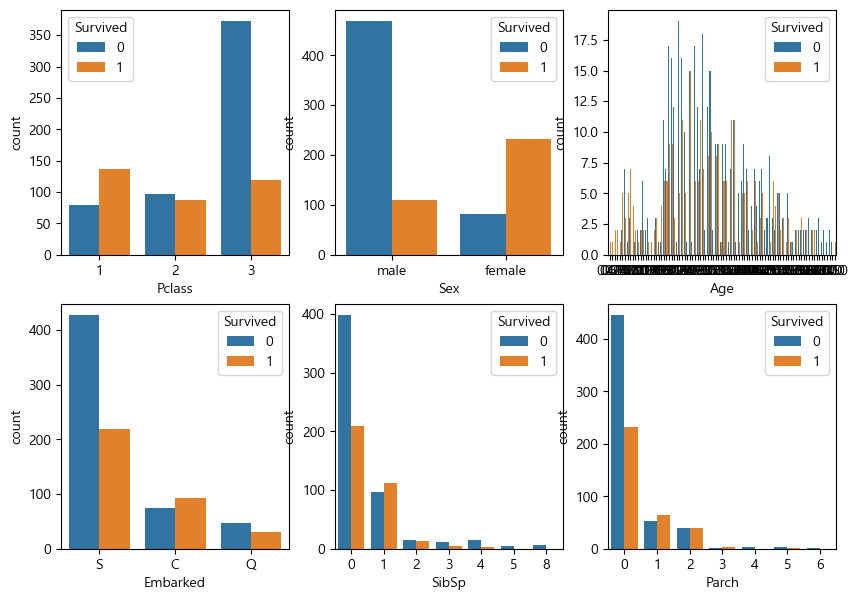

In [305]:
figure , ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (10,7))
sns.countplot(df , x = 'Pclass' , hue = 'Survived' , ax = ax1)
sns.countplot(df , x = 'Sex' , hue = 'Survived' , ax = ax2)
sns.countplot(df , x = 'Age' , hue = 'Survived' , ax = ax3)
sns.countplot(df , x = 'Embarked' , hue = 'Survived' , ax = ax4)
sns.countplot(df , x = 'SibSp' , hue = 'Survived' , ax = ax5)
sns.countplot(df , x = 'Parch' , hue = 'Survived' , ax = ax6)

plt.show()

In [306]:
df['Family_size'] = df['SibSp'] + df['Parch']

In [307]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: xlabel='Family_size', ylabel='count'>

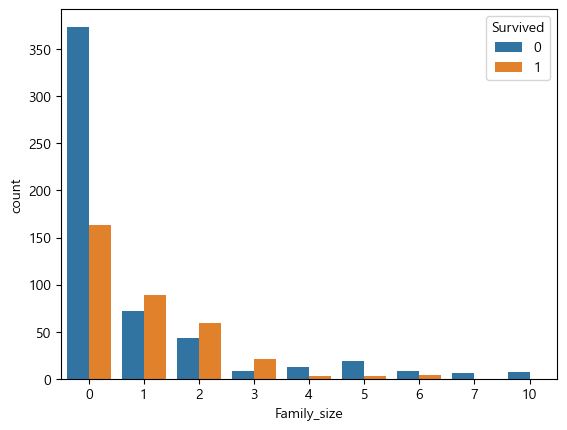

In [308]:
sns.countplot(df, x = 'Family_size', hue = 'Survived')

In [309]:
#혼자왔으면 1 아니면 0

df['Alone'] = [0 if i >= 1 else 1 for i in df['Family_size']] #df.loc[df['Family_size'] == 0 ,'Alone'] = 1 #df.loc[df['Family_size'] != 0 ,'Alone'] = 0 

In [310]:
df['Alone'].value_counts()

Alone
1    537
0    354
Name: count, dtype: int64

In [311]:
df.loc[df['Cabin'].isnull(),'Cabin_Use'] = 0
df.loc[df['Cabin'].notnull(),'Cabin_Use'] = 1

In [312]:
df['Cabin_Use'].value_counts()

Cabin_Use
0.0    687
1.0    204
Name: count, dtype: int64

In [313]:
df['Name'].sample(10)

PassengerId
602                                 Slabenoff, Mr. Petco
391                           Carter, Mr. William Ernest
447                    Mellinger, Miss. Madeleine Violet
430                   Pickard, Mr. Berk (Berk Trembisky)
857           Wick, Mrs. George Dennick (Mary Hitchcock)
537                    Butt, Major. Archibald Willingham
670    Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)
790                             Guggenheim, Mr. Benjamin
383                                   Tikkanen, Mr. Juho
689                      Fischer, Mr. Eberhard Thelander
Name: Name, dtype: object

In [314]:
def find_title(name):
    return name.split(",")[1].split(".")[0].strip()

In [315]:
df['title'] = df['Name'].apply(find_title)

In [316]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone,Cabin_Use,title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0.0,Mr


In [317]:
df['Master'] = [1 if i == 'Master' else 0 for i in df['title']]

In [318]:
df['Master'].value_counts()

Master
0    851
1     40
Name: count, dtype: int64

In [319]:
# MR, MISS, MRS, MASTER, DR 빼고 etc로바꾸기
# 방법 1
titles = df['title'].value_counts()
others = titles[titles <= 6].index
df['title_encode'] = df['title'].replace(others, 'etc')

In [320]:
df['title_encode'].value_counts()

title_encode
Mr        517
Miss      182
Mrs       125
Master     40
etc        20
Dr          7
Name: count, dtype: int64

In [321]:
# 방법 2
non_etc = ['Mr','Miss','Mrs','Master','Dr']
def title_etc(title):
    if title in non_etc:
        return title
    else:
        return 'etc'

df['title_encode'] = df['title'].apply(title_etc)
        

In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
#Label 인코딩
le = LabelEncoder()
df['title_label'] = le.fit_transform(df['title_encode'])


In [324]:
df['title_label'].value_counts()

title_label
3    517
2    182
4    125
1     40
5     20
0      7
Name: count, dtype: int64

In [325]:
df['Sex_encode'] = [0 if i == 'male' else 1 for i in df['Sex']]

In [327]:
embarked = pd.get_dummies(df['Embarked'] , prefix = 'Embarked')

In [333]:
df = pd.concat([df, embarked], axis=1)

In [329]:
df['Age'].isnull().sum()

np.int64(177)

In [335]:
df[df['Sex'] == 'male'].Age.mean()

np.float64(30.72664459161148)

In [339]:
#객실등급별 평균나이
print(df[df['Pclass'] == 1].Age.mean())
print(df[df['Pclass'] == 2].Age.mean())
print(df[df['Pclass'] == 3].Age.mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [349]:
m1 = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)].Age.mean()
m2 = df[(df['Sex'] == 'male') & (df['Pclass'] == 2)].Age.mean()
m3 = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)].Age.mean()
f1 = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)].Age.mean()
f2 = df[(df['Sex'] == 'female') & (df['Pclass'] == 2)].Age.mean()
f3 = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)].Age.mean()

In [350]:
df.loc[(df['Age'].isnull()) & (df['Sex'] == 'male') & (df['Pclass'] == 1), 'Age'] = m1
df.loc[(df['Age'].isnull()) & (df['Sex'] == 'male') & (df['Pclass'] == 2), 'Age'] = m2
df.loc[(df['Age'].isnull()) & (df['Sex'] == 'male') & (df['Pclass'] == 3), 'Age'] = m3
df.loc[(df['Age'].isnull()) & (df['Sex'] == 'female') & (df['Pclass'] == 1), 'Age'] = f1
df.loc[(df['Age'].isnull()) & (df['Sex'] == 'female') & (df['Pclass'] == 2), 'Age'] = f2
df.loc[(df['Age'].isnull()) & (df['Sex'] == 'female') & (df['Pclass'] == 3), 'Age'] = f3

In [354]:
df['Age'].isnull().sum()

np.int64(0)

In [399]:
#모델링

from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error , mean_squared_error , accuracy_score, r2_score, confusion_matrix , classification_report

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [353]:
x = df[['Pclass','Age','Fare','Family_size', 'Alone', 'Cabin_Use','Master','title_label',
           'Sex_encode','Embarked_C', 'Embarked_Q', 'Embarked_S']]

y = df['Survived']

In [361]:
X_train, X_test, y_train, y_test = train_test_split (x, y , random_state= 42, test_size = 0.2)

In [363]:
model = LogisticRegression()

In [366]:
model.fit(X_train,y_train)

LogisticRegression()

In [370]:
pred_log  = model.predict(X_test)

In [380]:
cm = confusion_matrix(y_test, pred_log)
print(cm)

[[91 14]
 [14 60]]


In [378]:
print('accuracy :', accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy : 0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



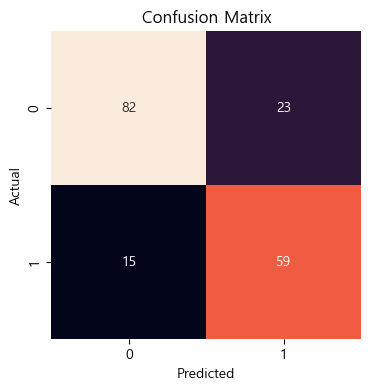

In [401]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [408]:
model_dec = DecisionTreeClassifier(random_state= 42, max_depth = 7)

In [409]:
model_dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [410]:
pred_dec = model_dec.predict(X_test)

In [411]:
cm_dec = confusion_matrix(y_test, pred_dec)

accuracy : 0.7932960893854749
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



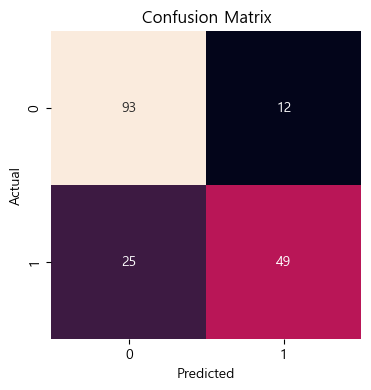

In [412]:
print('accuracy :', accuracy_score(y_test,pred_dec))
print(classification_report(y_test,pred_dec))
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dec, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [415]:
model_rf = RandomForestClassifier(random_state = 42 , n_estimators = 200)

In [416]:
model_rf.fit(X_train,y_train)

pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, pred_dec)

accuracy : 0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



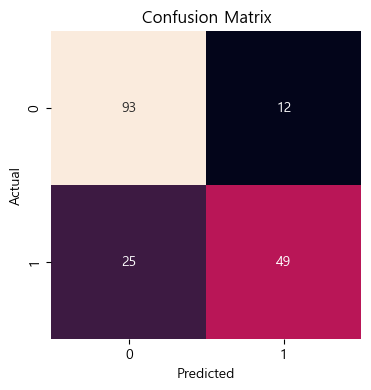

In [417]:
print('accuracy :', accuracy_score(y_test,pred_rf))
print(classification_report(y_test,pred_rf))
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [425]:
# 하이퍼 파라미터 튜닝
hyper_list = []

max_depth_list = [5,10,15,20]
max_feature_list = [0.5,0.6,0.7,0.8,0.9,1.0]

for a in max_depth_list:
    for b in max_feature_list:
        model = RandomForestClassifier(n_estimators = 100 , max_depth = a , max_features = b, random_state = 42 , n_jobs = -1)
        model.fit(X_train, y_train)
        rf_pred = model.predict(X_test)
        score = accuracy_score(y_test, rf_pred)
        hyper_list.append({'점수' : score,
                          'max_depth' : a,
                          'max_features': b})

        print(f'현재 스코어:{score}')

현재 스코어:0.8324022346368715
현재 스코어:0.8268156424581006
현재 스코어:0.8212290502793296
현재 스코어:0.8212290502793296
현재 스코어:0.8156424581005587
현재 스코어:0.8156424581005587
현재 스코어:0.8435754189944135
현재 스코어:0.8379888268156425
현재 스코어:0.8435754189944135
현재 스코어:0.8324022346368715
현재 스코어:0.8324022346368715
현재 스코어:0.8324022346368715
현재 스코어:0.8379888268156425
현재 스코어:0.8547486033519553
현재 스코어:0.8268156424581006
현재 스코어:0.8324022346368715
현재 스코어:0.8268156424581006
현재 스코어:0.8324022346368715
현재 스코어:0.8268156424581006
현재 스코어:0.8435754189944135
현재 스코어:0.8324022346368715
현재 스코어:0.8156424581005587
현재 스코어:0.8268156424581006
현재 스코어:0.8268156424581006


In [428]:
pd.DataFrame(hyper_list).sort_values(by = '점수', ascending = False)

,점수,max_depth,max_features
13,0.854749,15,0.6
6,0.843575,10,0.5
8,0.843575,10,0.7
19,0.843575,20,0.6
12,0.837989,15,0.5
7,0.837989,10,0.6
0,0.832402,5,0.5
11,0.832402,10,1.0
20,0.832402,20,0.7
17,0.832402,15,1.0


In [449]:
parameter = {
    'max_depth' : [5,10,15,20],
    'max_features' : [0.5,0.6,0.7,0.8,0.9,1.0]
}

reg = GridSearchCV(model_rf, parameter, cv = 3, verbose=2, scoring= "roc_auc")

In [450]:
reg.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ......................max_depth=5, max_features=0.5; total time=   0.9s
[CV] END ......................max_depth=5, max_features=0.5; total time=   0.9s
[CV] END ......................max_depth=5, max_features=0.5; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.6; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.6; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.6; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.7; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.7; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.7; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.8; total time=   1.0s
[CV] END ......................max_depth=5, max_features=0.8; total time=   1.0s
[CV] END ......................max_depth=5, max_

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='roc_auc', verbose=2)

In [451]:
best_params = reg.best_params_
best_score = reg.best_score_
print(f'Best parameters: {best_params}')
print(f'Best score: {abs(best_score)}')

Best parameters: {'max_depth': 5, 'max_features': 0.9}
Best score: 0.8708057776878001
